In [2]:
import sklearn
import pandas as pd
import numpy as np
import warnings
import os
import sys

pd.options.display.max_columns = 999
warnings.filterwarnings('ignore')

def numerical_dqr(df):
  
    # Select numerical columns
    numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
    # Data type
    data_types = pd.DataFrame(df[numerical].dtypes, columns = ['Data Type'])
  
    # Missing data
    missing_data = pd.DataFrame(df[numerical].isnull().sum(), columns = ['Missing Values'])
  
    # Unique values
    unique_values = pd.DataFrame(columns = ['Unique Values'])
    for row in list(df[numerical].columns.values):
        unique_values.loc[row] = [df[numerical][row].nunique()]
    
    # Number of records
    count_values = pd.DataFrame(columns = ['Count'])
    for row in list(df[numerical].columns.values):
        count_values.loc[row] = [df[numerical][row].count()]
    
    # Maximum value
    maximum_values = pd.DataFrame(columns = ['Maximum Value'])
    for row in list(df[numerical].columns.values):
        maximum_values.loc[row] = [df[numerical][row].max()]
    
    # Minimum value
    minimum_values = pd.DataFrame(columns = ['Minimum Value'])
    for row in list(df[numerical].columns.values):
        minimum_values.loc[row] = [df[numerical][row].min()]
    
    # Mean value
    mean_values = pd.DataFrame(columns = ['Mean Value'])
    for row in list(df[numerical].columns.values):
        mean_values.loc[row] = [df[numerical][row].mean()]
        
    # Standard Deviation
    std = pd.DataFrame(columns=['Standard Deviation'])
    for row in list(df[numerical].columns.values):
        std.loc[row] = [np.std(df[numerical][row])]
    
    # First quartile
    quartile_1 = pd.DataFrame(columns = ['1st Quartile'])
    for row in list(df[numerical].columns.values):
        quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
    # Median
    median = pd.DataFrame(columns = ['Median'])
    for row in list(df[numerical].columns.values):
        median.loc[row] = [df[numerical][row].quantile(0.5)]
    
    # Third quartile
    quartile_3 = pd.DataFrame(columns = ['3rd Quartile'])
    for row in list(df[numerical].columns.values):
        quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]

    # Join columns
    dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values)\
        .join(maximum_values).join(mean_values).join(std).join(quartile_1).join(median).join(quartile_3)

    # Percentage missing
    dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) * 100)

    # Change order of columns
    dq_report_num = dq_report_num[['Data Type', 'Count', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value',
                                   'Standard Deviation', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile',
                                   'Maximum Value']]

    # Round
    dq_report_num[['Missing %', 'Mean Value', 'Standard Deviation', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =  dq_report_num[['Missing %', 'Mean Value', 'Standard Deviation', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
    # Return report
    return(dq_report_num)

def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = ['object', 'category']).columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(df[categorical].columns.values):
    count_values.loc[row] = [df[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(df[categorical].columns.values):
    unique_values.loc[row] = [df[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(df[categorical].columns.values): 
    mode_values.loc[row] = [df[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = df[row].mode().iat[0]
    ModeFreq = df[row].value_counts()[mode]
    #print(x, mode, df[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(df[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %' , 'Mode %']].round(1  )

  #return report
  return(dq_report_cat)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, col, hue = None, xlabel = None, title = None, font_scale=2, figsize=(9, 8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra
    sns.set(font_scale = font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)}, figsize = figsize)
    # Crear boxplot
    sns.boxplot(data = data, x = col, hue = hue, ax = ax_box2)
    # Crear histograma
    sns.histplot(data = data, x = col, ax = ax_hist2, bins = bins, kde = True, hue = hue) if bins else sns.histplot(data = data, x = col, ax = ax_hist2, kde = True, hue = hue)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data[col]),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data[col]),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel = xlabel)
    if title: ax_box2.set(title = title, xlabel = xlabel)
    #if title: ax_box2.set(title=title.encode('utf-8').decode('latin1'), xlabel="")
    # Mostrar gráfico
    plt.show()
    
## Función para gráfico de barras de variables categóricas (básica)
def cat_plot(col):
     if col.dtypes == 'category':
        #fig = px.bar(col.value_counts())
        #pio.show(fig)
        fig = sns.countplot(x = col)
        plt.show()

## Función para gráfico de barras de variables categóricas. Muestra porcentajes en las etiquetas
def box_porcentajes (col):
    if col.dtypes == 'category':

        total = len(col)
        porcentajes = col.value_counts(normalize=True) * 100

        # Crear el gráfico de barras
        fig, ax = plt.subplots(figsize=(8, 6))  # Crear figura y ejes
        sns.countplot(x=col, ax=ax)  # Gráfico de barras

        # Agregar etiquetas de texto con los porcentajes
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height/total*100:.1f}%", (p.get_x() + p.get_width() / 2, height), ha='center', va='baseline')

        plt.show()
    
## Función general plot para aplicar al archivo por columnas
def plot(df, hue = None):
    """ Ejemplo de uso:
    plot(data, hue = 'target')
    data: contiene el dataframe completo, incluída la variable objetivo o target
    hue: Si quieremos segregar el boxplot en funcion de la variable objetivo, hay que introducir el nombre de la columna de la variable objetivo, en este caso, target.
    """
    tipos_prohibidos = ['category', 'object', 'datetime64[ns]']
    for col in df.columns:
        if df[col].dtype not in tipos_prohibidos:
            print('Cont: {}'.format(df[col].name))
            histogram_boxplot(df, col = col, hue = hue, xlabel = df[col].name, title = 'Distibución continua')
        elif df[col].dtype == 'category':
            print('Cat: {}'.format(df[col].name))
            #cat_plot(col)
            box_porcentajes(df[col])
        elif df[col].dtype == 'datetime64[ns]':
            print('Fecha')

## Función manual de winsor con clip+quantile 
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

## Función para gestionar outliers
def gestiona_outliers(col, clas = 'check'):
    
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>8
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)


In [4]:
# Leemos los datos
train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_target = train['Credit_Score']
train_features = train[[col for col in train.columns if col != 'Credit_Score']]

In [5]:
# Guardamos los id
test_id = test_data['ID']
test_data.drop(['ID'], axis = 'columns', inplace = True)

#Borramos id de train_features y, también, id de train_target, porque lo vamos a juntar y trabajar conjuntamente
train_features.drop('ID', axis = 'columns', inplace = True)
# train_target.drop('ID', axis = 'columns', inplace = True)

# Usamos concat porque los id están ordenados. Si no, merge
train_data = pd.concat([train_features, train_target], axis = 1)

#train_data contiene features y target de los datos train, juntos.

Creamos una serie de nuevas columnas a partir de las fechas y eliminamos la columna orginal de fechas. En principio, pueden tener cierto poder predictivo, pero no lo sabemos con seguridad. Ya lo comprobaremos más adelante.

In [6]:
numerical_dqr(train_data)

,Data Type,Count,Unique Values,Missing Values,Missing %,Mean Value,Standard Deviation,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
Monthly_Inhand_Salary,float64,84998,13235,15002,15.0,4194.2,3183.7,303.6,1625.6,3093.7,5957.4,15204.6
Num_Bank_Accounts,int64,100000,943,0,0.0,17.1,117.4,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,int64,100000,1179,0,0.0,22.5,129.1,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,int64,100000,1750,0,0.0,72.5,466.4,1.0,8.0,13.0,20.0,5797.0
Delay_from_due_date,int64,100000,73,0,0.0,21.1,14.9,-5.0,10.0,18.0,28.0,67.0
Num_Credit_Inquiries,float64,98035,1223,1965,2.0,27.8,193.2,0.0,3.0,6.0,9.0,2597.0
Credit_Utilization_Ratio,float64,100000,100000,0,0.0,32.3,5.1,20.0,28.1,32.3,36.5,50.0
Total_EMI_per_month,float64,100000,14950,0,0.0,1403.1,8306.0,0.0,30.3,69.2,161.2,82331.0


Conclusiones:
- Hay missings evidentes en dos columnas: 'Monthly_Inhand_Salary' y 'Num_Credit_inquiries'
- Hay valores que parecen incorrectos para ciertas columnas. Por ejemplo, 'Num_Bank_Accounts' y 'Delay_from_due_data' toman los valores -1.0 y -5.0, respectivamente. Son valores incorrectos. No pueden ser negativos en ningún caso. Por tanto, además de convertirlos a números enteros en lugar de reales, asumiremos que todos los números negativos son missings
- En columnas como 'Num_Credit_Inquiries' hay mucha diferencia entre la mediana y el valor máximo, lo cual hace sospechar sobre la existencia de outliers o incluso una distribución de los datos poco favorable que quizás podamos solucionar pasando dicha columna a escala logarítmica.
- También en la columna 'Num_Credit_Inquiries' existen valores 0, lo cual no tendría sentido. En este TFM se está asignando a cada 'solicitante de crédito' una puntuación según el riesgo de impago. Si un usuario no ha solicitado ninguno entonces no debería estar presente en el dataset.

In [7]:
categorical_dqr(train_data)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
Customer_ID,object,100000,12500,0,0.0,CUS_0x1000,8,0.0
Month,object,100000,8,0,0.0,April,12500,12.5
Name,object,90015,10139,9985,10.0,Langep,44,0.0
Age,object,100000,1788,0,0.0,38,2833,2.8
SSN,object,100000,12501,0,0.0,#F%$D@*&8,5572,5.6
Occupation,object,100000,16,0,0.0,_______,7062,7.1
Annual_Income,object,100000,18940,0,0.0,17273.83,16,0.0
Num_of_Loan,object,100000,434,0,0.0,3,14386,14.4
Type_of_Loan,object,88592,6260,11408,11.4,Not Specified,1408,1.6
Num_of_Delayed_Payment,object,92998,749,7002,7.0,19,5327,5.7


Conclusiones:
- Hay columnas categóricas que deberían ser numéricas con total seguridad: 'Annual_Income', 'Num_Banck_Accounts', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Amount_invested_monthly', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Delay_from_due_date', 
'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan'. Luego casteamos.
- A parte de los nulos que tiene cada variable, se encuentran ciertos valores como '__-333333333333333333333333333_' de 'Monthly_Balance' o '_______' de 'Occupation' que no tienen ningún significado, por lo tanto, son valores nulos mal tipificados.
- No hay ninguna columna que tenga un número de nulos extremadamente elevado. No borraremos ninguna por ese motivo, en prinicpio.
- Las columnas 'Credit_History_Age' y 'Payment_Behaviour' tienen un contenido cono poco valor predictivo si no las transformamos en el proceso de 'Feature Engineering'
- Payment_of_Min_Amount es una columna con valores 'yes', 'no' y 'NM'. Es decir, se trata de una variable booleana (1 y 0) con 'NM' como nulo
- Del mismo modo 'Num_of_Loan', que se refiere al número de préstamos, 'Num_of_Delayed_Payment' referido a pagos pendientes y 'Changed_Credit_Limit' ¡NO pueden ser negativos! Los valores negativos de estas columans serán tipificados como nulos

Ahora trabajamos:
- convierto en nulo todos los valores incorrectos de la base de datos, como se ha explicado arriba.

In [8]:
train_data = train_data.drop_duplicates()
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', None)
train_data['Occupation'] = train_data['Occupation'].replace('_______', None)
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].replace('__10000__', None)
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].replace('_', None)
train_data.loc[train_data['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = None
train_data.loc[train_data['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = None
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].replace('!@9#%8', None)
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].replace('NM', None)
train_data['Credit_Mix'] = train_data['Credit_Mix'].replace('_', None)
train_data['Occupation'] = train_data['Occupation'].replace({np.nan: None})
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].replace({np.nan: None})

In [13]:
# La columna'Annual_Income' debería ser claramente numérica pero tiene valores como este 38321.39_. Si son pocos 
# los convertiré a null. Si son muchos, sustituiré caracteres alafanumericos por cero.
# pasa exactamente lo mismo con la coluymna 'Num_of_Loan' y Num_of_Delayed_Payment y Age
valores_no_numericos = train_data['Num_of_Delayed_Payment'].str.contains(r'[^0-9.-]', regex=True)

# Los _ están al final del número, a la derecha de la coma. Por tanto, lo convertiré en cero
train_data['Annual_Income'] = train_data['Annual_Income'].str.replace(r'[^0-9.-]', '0')
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace(r'[^0-9.-]', '0') 
train_data['Age'] = train_data['Age'].str.replace(r'[^0-9.-]', '0')
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace(r'[^0-9.-]', '0')
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.replace(r'[^0-9.-]', '0')
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace(r'[^0-9.-]', '0')
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace(r'[^0-9.-]', '0')
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace(r'[^0-9.-]', '0')

In [14]:
# Amount_invested_monthly and Monthly_Balance should be numerical columns
train_data[['Annual_Income', 'Monthly_Balance', 'Amount_invested_monthly', 'Outstanding_Debt']] = train_data[['Annual_Income', 'Monthly_Balance', 'Amount_invested_monthly', 'Outstanding_Debt']].astype(float)

# Num_of_Loan columns has only integer values but is of object type. We will cast to integer
train_data[['Num_of_Loan', 'Age']] = train_data[['Num_of_Loan', 'Age']].astype(int)
train_data['Num_of_Delayed_Payment'] = pd.to_numeric(train_data['Num_of_Delayed_Payment'], errors='coerce')
train_data['Changed_Credit_Limit'] = pd.to_numeric(train_data['Changed_Credit_Limit'], errors='coerce')

#'Changed_Credit_Limit'
train_data['Age'] = train_data['Age'].apply(lambda x: None if (x < 0 or x > 120) else x)
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].apply(lambda x: None if (x < 0) else x)
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].apply(lambda x: None if (x < 0) else x)
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].apply(lambda x: None if (x < 0) else x)

# Encontramos columnas numéricas con menos de 10 valores 
columnas_object = train_data.select_dtypes(include = 'object').columns.tolist()
def convert_to_category(df, cols):
    """
    Convierte las columnas especificadas en la lista 'cols' a tipo 'category' en el DataFrame 'df'.
    """
    for col in cols:
        df[col] = df[col].astype('category')
    return df

# Llamar a la función para convertir las columnas en 'train_data' a tipo 'category'
train_data = convert_to_category(train_data, columnas_object)
train_data = train_data.drop(['Customer_ID', 'Name', 'SSN'], axis=1)



ValueError: could not convert string to float: '34847.84_'

In [ ]:
numerical_dqr(train_data)

In [51]:
# plot(train_data, hue = 'Credit_Score')

In [52]:
"""columnas_numericas = ((train_data.select_dtypes(include=['number'])).columns).to_list()
columnas_objeto = ((train_data.select_dtypes(include=['object', 'category'])).columns).to_list()

from sklearn.impute import SimpleImputer

# Para variables numéricas
numeric_imputer = SimpleImputer(strategy='median')
train_data[columnas_numericas] = numeric_imputer.fit_transform(train_data[columnas_numericas])

# Para variables categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[columnas_objeto] = categorical_imputer.fit_transform(train_data[columnas_objeto])

#Manual VARAIBLES CATEGÓRICAS IMPUTADAS POR MODA
train_data['Occupation'].fillna(train_data['Occupation'].mode()[0], inplace=True)
train_data['Payment_of_Min_Amount'].fillna(train_data['Payment_of_Min_Amount'].mode()[0], inplace=True)
train_data['Credit_Mix'].fillna(train_data['Credit_Mix'].mode()[0], inplace=True)

"""

"columnas_numericas = ((train_data.select_dtypes(include=['number'])).columns).to_list()\ncolumnas_objeto = ((train_data.select_dtypes(include=['object', 'category'])).columns).to_list()\n\nfrom sklearn.impute import SimpleImputer\n\n# Para variables numéricas\nnumeric_imputer = SimpleImputer(strategy='median')\ntrain_data[columnas_numericas] = numeric_imputer.fit_transform(train_data[columnas_numericas])\n\n# Para variables categóricas\ncategorical_imputer = SimpleImputer(strategy='most_frequent')\ntrain_data[columnas_objeto] = categorical_imputer.fit_transform(train_data[columnas_objeto])\n\n#Manual VARAIBLES CATEGÓRICAS IMPUTADAS POR MODA\ntrain_data['Occupation'].fillna(train_data['Occupation'].mode()[0], inplace=True)\ntrain_data['Payment_of_Min_Amount'].fillna(train_data['Payment_of_Min_Amount'].mode()[0], inplace=True)\ntrain_data['Credit_Mix'].fillna(train_data['Credit_Mix'].mode()[0], inplace=True)\n\n"

In [53]:
# IMPUTACION POR METODO DE LOS VECINOS MÁS PROXIMOS POR EJEMPLO
from sklearn.impute import KNNImputer, SimpleImputer
y = train_data['Credit_Score']

X = train_data.drop('Credit_Score', axis = 1)
columnas_numericas = X.select_dtypes(include=['float64', 'int32', 'int64']).columns.tolist()

# Separar las columnas numéricas
data_numericas = X[columnas_numericas].copy()

# Crear una instancia de KNNImputer y aplicar la imputación
imputer = KNNImputer(n_neighbors=5)
data_numericas_imputadas = imputer.fit_transform(data_numericas)

# Crear un nuevo DataFrame con las columnas imputadas
data_numericas_imputadas_df = pd.DataFrame(data_numericas_imputadas, columns=columnas_numericas)

# Combinar las columnas numéricas imputadas con el DataFrame original
train_data = pd.concat([X.drop(columns=columnas_numericas), data_numericas_imputadas_df, y], axis=1)

columnas_objeto = ((train_data.select_dtypes(include=['object', 'category'])).columns).to_list()
# Para variables categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[columnas_objeto] = categorical_imputer.fit_transform(train_data[columnas_objeto])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_13512\1542154362.py", line 13, in <cell line: 13>
    data_numericas_imputadas = imputer.fit_transform(data_numericas)
  File "c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py", line 699, in fit_transform
    -------
  File "c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\impute\_knn.py", line 297, in transform
  File "c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py", line 1623, in pairwise_distances_chunked
    --------
  File "c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    @wraps(f)
  File "c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py", line 1790, in pairwise_distances
    iterator = itertools.combinations(range(X.

In [ ]:
train_data.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,15 Years and 11 Months,No,Low_spent_Large_value_payments,23.0,19114.12,1493.906333,3.0,4.0,3.0,4.0,9.6,20.8,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,23.4,19114.12,1659.374833,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,23.0,19114.12,1493.906333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,6.6,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,Good


In [ ]:
# Encontramos columnas numéricas con menos de 10 valores 
columnas_object = train_data.select_dtypes(include = 'object').columns.tolist()

# Crear una lista para almacenar las columnas numéricas con menos de 10 categorías distintas
columnas_numericas_con_pocas_categorias = []

# Iterar a través de las columnas del DataFrame
for col in train_data.columns:
    # Verificar si la columna es de tipo numérico
    if train_data[col].dtype != 'object':
        # Verificar si la columna tiene menos de 10 categorías distintas
        if train_data[col].nunique() < 10:
            # Agregar la columna a la lista de columnas numéricas con pocas categorías distintas
            columnas_numericas_con_pocas_categorias.append(col)
    
# En este momento tenemos dos listas de columnas que hay que convertir a categóricas
# Las podemos juntar para mayor comodidad
columnas_seleccionadas = columnas_object + columnas_numericas_con_pocas_categorias
def convert_to_category(df, cols):
    """
    Convierte las columnas especificadas en la lista 'cols' a tipo 'category' en el DataFrame 'df'.
    """
    for col in cols:
        df[col] = df[col].astype('category')
    return df

# Llamar a la función para convertir las columnas en 'train_data' a tipo 'category'
train_data = convert_to_category(train_data, columnas_seleccionadas)

# Eliminar 'status_group' de la lista 'columnas_seleccionadas'
columnas_seleccionadas.remove('Credit_Score')

# Aplicar la función de conversión a tipo 'category' en las columnas seleccionadas del conjunto de prueba
test_data = convert_to_category(test_data, columnas_seleccionadas)


In [ ]:
print(test_data.shape)
print(train_data.shape)
test_data.dtypes

(50000, 26)
(100000, 24)


Customer_ID                   object
Month                       category
Name                          object
Age                           object
SSN                           object
Occupation                  category
Annual_Income                 object
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                   object
Type_of_Loan                category
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit          object
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Credit_History_Age          category
Payment_of_Min_Amount       category
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour           category
Monthly_Balance               object
dtype: object

In [ ]:
# Hay varias columnas tipificadas como categóricas que deberían ser numéricas
float_columns = ['Annual_Income','Amount_invested_monthly', 
                 'Amount_invested_monthly', 'Monthly_Balance']
num_columns = ['Age', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
               'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries']
train_data[num_columns] = train_data[num_columns].astype(int)
# train_data[float_columns] = train_data[float_columns].astype('float64')

In [ ]:
# Feature Engineering
train_data.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,809.98,26.822620,49.574949,80.415295,312.494089,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,15 Years and 11 Months,No,Low_spent_Large_value_payments,23,19114.12,1493.906333,3,4,3,4,9,20,11.27,4,809.98,31.944960,49.574949,118.280222,284.629162,Good
2,March,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,23,19114.12,1659.374833,3,4,3,4,3,7,11.27,4,809.98,28.609352,49.574949,81.699521,331.209863,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,23,19114.12,1493.906333,3,4,3,4,5,4,6.27,4,809.98,31.377862,49.574949,199.458074,223.451310,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,23,19114.12,1824.843333,3,4,3,4,6,6,11.27,4,809.98,24.797347,49.574949,41.420153,341.489231,Good


In [ ]:
# Antes de nada hay que trabajar con dos variables inicialmente categóricas que tienen muchos valores permitidos de los cuales no se puede extraer información útil: 'Type_of_loan'
# and 'Credit_history_Age'
# Definir una expresión regular para extraer los años y los meses
pattern = r'(\d+) Years and (\d+) Months'

# Usar str.extract() para extraer los valores y crear nuevas columnas
train_data[['Credit_History_Years', 'Credit_History_Months']] = train_data['Credit_History_Age'].str.extract(pattern, expand=True)

# Convertir las columnas 'Years' y 'Months' a tipo numérico
train_data['Credit_History_Years'] = pd.to_numeric(train_data['Credit_History_Years'], errors='coerce')
train_data['Credit_History_Months'] = pd.to_numeric(train_data['Credit_History_Months'], errors='coerce')

# Reemplazar valores no válidos por NaN si es necesario
train_data['Credit_History_Years'].fillna(0, inplace=True)
train_data['Credit_History_Months'].fillna(0, inplace=True)

train_data['Credit_History_Days'] = 12 * 30 * train_data['Credit_History_Years'] + 30 * train_data['Credit_History_Months']

# hacer lo mismo con otras variables como Payment_Behaviour y Type_of_Loan
# Very Very important antes de hacer One Hot Encoder

# Type_of_Loan tiene más de 6000 opciones diferentes. Eliminamos la columna junto con la de 'Name'
pattern = r'(.*?)_spent_(.*?)_value_payments'
extracted = train_data['Payment_Behaviour'].str.extract(pattern, expand=True)
extracted.columns = ['Before_spent', 'Between_spent_and_value']
extracted_df = pd.DataFrame(extracted, columns=['Before_spent', 'Between_spent_and_value'])
train_data = pd.concat([train_data, extracted_df], axis=1)

train_data = train_data.drop(['Type_of_Loan', 'Payment_Behaviour', 'Credit_History_Age'], axis=1)
train_data['Before_spent'].fillna(train_data['Before_spent'].mode()[0], inplace=True)
train_data['Between_spent_and_value'].fillna(train_data['Between_spent_and_value'].mode()[0], inplace=True)

# Llamar a la función para convertir las columnas en 'train_data' a tipo 'category'
train_data = convert_to_category(train_data, ['Before_spent', 'Between_spent_and_value'])

In [ ]:
numerical_dqr(train_data)

,Data Type,Count,Unique Values,Missing Values,Missing %,Mean Value,Standard Deviation,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
Age,int32,100000,52,0,0.0,33.3,10.6,14,25.0,33.0,41.0,118
Annual_Income,float64,100000,13487,0,0.0,176415.7,1429610.9,7005.93,19457.5,37578.6,72790.9,24198062.0
Monthly_Inhand_Salary,float64,100000,24632,0,0.0,4198.1,3185.1,303.645417,1628.1,3097.8,5956.0,15204.633333
Num_Bank_Accounts,int32,100000,942,0,0.0,17.1,117.4,0,3.0,6.0,7.0,1798
Num_Credit_Card,int32,100000,1179,0,0.0,22.5,129.1,0,4.0,5.0,7.0,1499
Interest_Rate,int32,100000,1750,0,0.0,72.5,466.4,1,8.0,13.0,20.0,5797
Num_of_Loan,int32,100000,495,0,0.0,10.6,155.5,0,2.0,3.0,6.0,14590
Delay_from_due_date,int32,100000,68,0,0.0,21.1,14.8,0,10.0,18.0,28.0,67
Num_of_Delayed_Payment,int32,100000,965,0,0.0,38.4,392.0,0,9.0,14.0,19.0,39200
Changed_Credit_Limit,float64,100000,4740,0,0.0,10.5,6.6,0.0,5.5,9.4,14.9,36.97


In [ ]:
#######################
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Separar las columnas numéricas y categóricas
columnas_numericas = ['Total_EMI_per_month', 'Num_Credit_Card', 'Num_Bank_Accounts', 'Interest_Rate', 'Changed_Credit_Limit', 'Num_of_Loan']

# Crear DataFrames separados para las columnas numéricas y categóricas
data_numericas = train_data[columnas_numericas].copy()

# Aplicar PowerTransformer a las columnas numéricas
power = PowerTransformer(method='yeo-johnson', standardize=False)
data_numericas_transformadas = power.fit_transform(data_numericas)

# Convertir el resultado de la transformación en un DataFrame con los mismos nombres de columnas
data_numericas_transformadas = pd.DataFrame(data_numericas_transformadas, columns=columnas_numericas)
# Agregar "_transform" al final de cada nombre de columna en data_numericas_transformadas
data_numericas_transformadas.columns = [col + '_transform' for col in data_numericas_transformadas.columns]

# Unir los DataFrames transformados y categóricos
train_data_transformado = pd.concat([data_numericas_transformadas, train_data], axis=1)
train_data_transformado = train_data_transformado.drop_duplicates()


In [ ]:
# plot(train_data_transformado, hue='Credit_Score')

OUTLIERS
*¿Si o no?

In [ ]:
X = train_data_transformado.drop('Credit_Score', axis = 1)
X_outliers = X.select_dtypes(include = np.number).copy().apply(lambda x: gestiona_outliers(x, clas = 'winsor'))
columnas_eliminar = X_outliers.columns.tolist()
X = X.drop(columns=columnas_eliminar)
X = pd.concat([X, X_outliers], axis = 1)

Total_EMI_per_month_transform
Num_Credit_Card_transform
Num_Bank_Accounts_transform
Interest_Rate_transform
Changed_Credit_Limit_transform
Num_of_Loan_transform
Age
Annual_Income
Monthly_Inhand_Salary
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance
Credit_History_Years
Credit_History_Months
Credit_History_Days


In [ ]:
X.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Before_spent,Between_spent_and_value,Total_EMI_per_month_transform,Num_Credit_Card_transform,Num_Bank_Accounts_transform,Interest_Rate_transform,Changed_Credit_Limit_transform,Num_of_Loan_transform,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Years,Credit_History_Months,Credit_History_Days
0,January,Scientist,_,No,High,Small,3.803066,1.015334,1.193722,1.152932,4.331456,1.351217,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,809.98,26.822620,49.574949,80.415295,312.494089,22,1,7950
1,February,Scientist,Good,No,Low,Large,3.803066,1.015334,1.193722,1.152932,4.331456,1.351217,23,19114.12,1493.906333,3,4,3,4,9,20,11.27,4,809.98,31.944960,49.574949,118.280222,284.629162,15,11,5730
2,March,Scientist,Good,No,Low,Medium,3.803066,1.015334,1.193722,1.152932,4.331456,1.351217,23,19114.12,1659.374833,3,4,3,4,3,7,11.27,4,809.98,28.609352,49.574949,81.699521,331.209863,22,3,8010
3,April,Scientist,Good,No,Low,Small,3.803066,1.015334,1.193722,1.152932,3.036586,1.351217,23,19114.12,1493.906333,3,4,3,4,5,4,6.27,4,809.98,31.377862,49.574949,199.458074,223.451310,22,4,8040
4,May,Scientist,Good,No,High,Medium,3.803066,1.015334,1.193722,1.152932,4.331456,1.351217,23,19114.12,1824.843333,3,4,3,4,6,6,11.27,4,809.98,24.797347,49.574949,41.420153,341.489231,22,5,8070


In [ ]:
# Separamos de nuevo target y features para aplicar correctamente los modelos
# X = train_data.drop('Credit_Score', axis = 1)
y = train_data['Credit_Score']
columnas_objeto = ((X.select_dtypes(include=['object', 'category'])).columns).to_list()

# Estandarizamos numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.select_dtypes(include = 'number').columns] = scaler.fit_transform(X.select_dtypes(include = 'number'))
# Crear instancia de StandardScaler
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# Ajusta el codificador a tus datos
encoder.fit(X[columnas_objeto])
encoded_data = encoder.transform(X[columnas_objeto])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(columnas_objeto))

# Combina los DataFrames codificados con el DataFrame original
X = pd.concat([X, encoded_df], axis=1)

# Elimina las columnas categóricas originales si es necesario
X.drop(columnas_objeto, axis=1, inplace=True)

# X[X.select_dtypes(include='number').columns] = scaler.fit_transform(X.select_dtypes(include='number'))


In [ ]:
!pip install --upgrade --user scikit-learn



In [ ]:
# Ahora normalizamos la variable objetivo
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy = 'auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py)

In [ ]:
# Separamos de nuevo target y features para aplicar correctamente los modelos
# X = train_data.drop('Credit_Score', axis = 1)
X = X_data_rus
y = y_data_rus
columnas_objeto = ((X.select_dtypes(include=['object', 'category'])).columns).to_list()

# Estandarizamos numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.select_dtypes(include = 'number').columns] = scaler.fit_transform(X.select_dtypes(include = 'number'))
# Crear instancia de StandardScaler
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# Ajusta el codificador a tus datos
# encoder.fit(X[columnas_objeto])
# encoded_data = encoder.transform(X[columnas_objeto])
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(columnas_objeto))

# Combina los DataFrames codificados con el DataFrame original
# X = pd.concat([X, encoded_df], axis=1)

# Elimina las columnas categóricas originales si es necesario
# X.drop(columnas_objeto, axis=1, inplace=True)

# X[X.select_dtypes(include='number').columns] = scaler.fit_transform(X.select_dtypes(include='number'))


NameError: name 'X_data_rus' is not defined

In [ ]:
y.value_counts(normalize=True)
X.head()

,Total_EMI_per_month_transform,Num_Credit_Card_transform,Num_Bank_Accounts_transform,Interest_Rate_transform,Changed_Credit_Limit_transform,Num_of_Loan_transform,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Years,Credit_History_Months,Credit_History_Days,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Before_spent_High,Before_spent_Low,Between_spent_and_value_Large,Between_spent_and_value_Medium,Between_spent_and_value_Small
0,-0.065976,-0.377254,-0.413404,-1.479648,0.387409,0.326769,-1.013986,-0.262817,-0.763038,-0.213985,-0.183895,-0.229614,-0.124426,-1.155077,-0.293563,0.216034,-0.166832,-0.517078,-1.102456,-0.191968,-0.599946,-0.444979,0.482327,-1.436949,0.429636,-0.399336,-0.398231,-0.390074,2.787531,-0.397881,-0.400515,-0.387965,-0.399200,-0.271021,-0.26916,-0.269501,-0.263826,-0.274011,-0.267826,-0.266636,-0.416534,-0.261479,-0.266971,-0.26733,-0.262222,4.012895,-0.270102,-0.254505,-0.476253,-0.705462,1.034859,1.176332,-1.176332,1.167320,-1.167320,-0.583303,-0.698178,1.153463
1,-0.065976,-0.377254,-0.413404,-1.479648,0.387409,0.326769,-1.013986,-0.262817,-0.864620,-0.213985,-0.183895,-0.229614,-0.124426,-0.751299,0.015687,0.216034,-0.166832,-0.517078,-0.076243,-0.191968,-0.410049,-0.573498,-0.406031,1.382408,-0.355176,-0.399336,-0.398231,2.795277,-0.389474,-0.397881,-0.400515,-0.387965,-0.399200,-0.271021,-0.26916,-0.269501,-0.263826,-0.274011,-0.267826,-0.266636,-0.416534,-0.261479,-0.266971,-0.26733,-0.262222,4.012895,-0.270102,-0.254505,-0.476253,1.457147,-0.996896,1.176332,-1.176332,-0.883684,0.883684,1.811240,-0.698178,-0.908070
2,-0.065976,-0.377254,-0.413404,-1.479648,0.155716,0.326769,-1.013986,-0.262817,-0.813829,-0.213985,-0.183895,-0.229614,-0.124426,-1.155077,-0.293563,-0.025484,-0.166832,-0.517078,-0.744501,-0.191968,-0.593506,-0.358659,0.482327,-0.873078,0.450847,-0.399336,-0.398231,-0.390074,-0.389474,-0.397881,-0.400515,2.811238,-0.399200,-0.271021,-0.26916,-0.269501,-0.263826,-0.274011,-0.267826,-0.266636,-0.416534,-0.261479,-0.266971,-0.26733,-0.262222,4.012895,-0.270102,-0.254505,-0.476253,1.457147,-0.996896,1.176332,-1.176332,-0.883684,0.883684,-0.583303,1.511804,-0.908070
3,-0.065976,-0.377254,-0.413404,-1.479648,-0.449991,0.326769,-1.013986,-0.262817,-0.864620,-0.213985,-0.183895,-0.229614,-0.124426,-1.020484,-0.364928,-0.568115,-0.166832,-0.517078,-0.189856,-0.191968,-0.002933,-0.855661,0.482327,-0.591142,0.461452,2.753327,-0.398231,-0.390074,-0.389474,-0.397881,-0.400515,-0.387965,-0.399200,-0.271021,-0.26916,-0.269501,-0.263826,-0.274011,-0.267826,-0.266636,-0.416534,-0.261479,-0.266971,-0.26733,-0.262222,4.012895,-0.270102,-0.254505,-0.476253,1.457147,-0.996896,1.176332,-1.176332,-0.883684,0.883684,-0.583303,-0.698178,1.153463
4,-0.065976,-0.377254,-0.413404,-1.479648,0.387409,0.326769,-1.013986,-0.262817,-0.763038,-0.213985,-0.183895,-0.229614,-0.124426,-0.953188,-0.317351,0.216034,-0.166832,-0.517078,-1.508200,-0.191968,-0.795511,-0.311248,0.482327,-0.309206,0.472058,-0.399336,-0.398231,-0.390074,-0.389474,-0.397881,-0.400515,-0.387965,2.754749,-0.271021,-0.26916,-0.269501,-0.263826,-0.274011,-0.267826,-0.266636,-0.416534,-0.261479,-0.266971,-0.26733,-0.262222,4.012895,-0.270102,-0.254505,-0.476253,1.457147,-0.996896,1.176332,-1.176332,1.167320,-1.167320,-0.583303,1.511804,-0.908070


In [ ]:
# plot(pd.concat([X_outliers, train_data['Credit_Score']], axis = 1), hue='Credit_Score')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Cargar tus datos (asegúrate de tener los datos cargados en 'train_data')
# X = train_data.drop('Credit_Score', axis=1)
# y = train_data['Credit_Score']

# Inicializar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
X['aleatorio'] = np.random.uniform(0, 1, len(X))
X['aleatorio2'] = np.random.uniform(0, 1, len(X))

# Entrenar el modelo
rf.fit(X, y)

# Obtener la importancia de las características del modelo Random Forest
feature_importances = rf.feature_importances_

# Crear un DataFrame que incluya el nombre de la característica y su importancia
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras para visualizar la importancia de características
plt.figure(figsize=(12, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

X.drop(['aleatorio', 'aleatorio2'], axis = 1, inplace = True)

In [ ]:
columnas_seleccionadas = feature_importance_df[feature_importance_df['Importance'] > 0.021]['Feature'].tolist()
# columnas_seleccionadas = ['''Interest_Rate_transform', 'Interest_Rate','Credit_History_Days', 'Num_Bank_Accounts_transform', 'Changed_Credit_Limit_transform', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_No', 'Changed_Credit_Limit', 'Num_Credit_Card_transform', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Monthly_Inhand_Salary', 'Credit_History_Years', 'Annual_Income', 'Monthly_Balance', 'Age', 'Amount_invested_monthly', 'Total_EMI_per_month', 'Payment_of_Min_Amount_Yes', 'Credit_Utilization_Ratio']
columnas_seleccionadas = ['Outstanding_Debt', 'Interest_Rate_transform', 'Delay_from_due_date', 'Interest_Rate', 'Credit_Mix_Good', 'Num_Credit_Inquiries', 'Credit_History_Days', 'Num_Bank_Accounts_transform', 'Num_of_Delayed_Payment', 'Credit_Mix_Standard', 'Changed_Credit_Limit_transform', 'Payment_of_Min_Amount_No', 'Changed_Credit_Limit', 'Num_Credit_Card', 'Num_Credit_Card_transform', 'Num_Bank_Accounts', 'Monthly_Inhand_Salary', 'Annual_Income', 'Monthly_Balance', 'Age', 'Amount_invested_monthly', 'Credit_History_Years']
print(columnas_seleccionadas)
X = X[columnas_seleccionadas]

['Outstanding_Debt', 'Interest_Rate_transform', 'Delay_from_due_date', 'Interest_Rate', 'Credit_Mix_Good', 'Num_Credit_Inquiries', 'Credit_History_Days', 'Num_Bank_Accounts_transform', 'Num_of_Delayed_Payment', 'Credit_Mix_Standard', 'Changed_Credit_Limit_transform', 'Payment_of_Min_Amount_No', 'Changed_Credit_Limit', 'Num_Credit_Card', 'Num_Credit_Card_transform', 'Num_Bank_Accounts', 'Monthly_Inhand_Salary', 'Annual_Income', 'Monthly_Balance', 'Age', 'Amount_invested_monthly', 'Credit_History_Years']


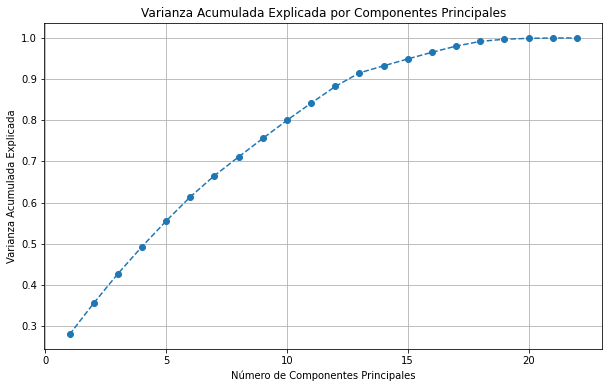

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que ya tienes tus datos en X (asegúrate de escalarlos si es necesario)

# Ajustar el modelo PCA
pca = PCA()
pca.fit(X)

# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Calcular la varianza acumulada explicada
varianza_acumulada = np.cumsum(varianza_explicada)

# Crear un gráfico de la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid()
plt.show()

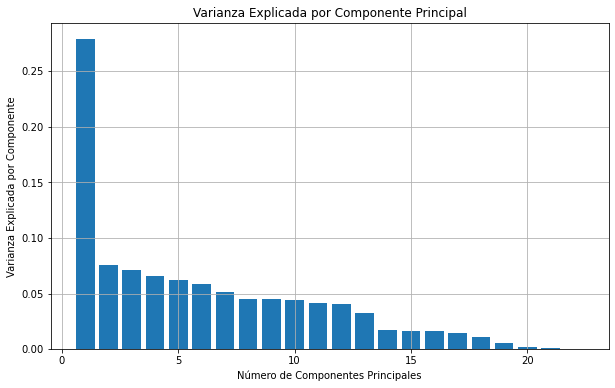

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que ya tienes tus datos en X (asegúrate de escalarlos si es necesario)

# Ajustar el modelo PCA
pca = PCA()
pca.fit(X)

# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Crear un gráfico de la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada por Componente')
plt.title('Varianza Explicada por Componente Principal')
plt.grid()
plt.show()


Se construye una función que evalua modelos de manera consecutiva mediante validación cruzada repetida y muestra el 'scoring' elegido, así como la matriz de confusión si así lo deseamos.

In [38]:
#Aplicamos modelos por fin
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define tu propia red neuronal
def create_custom_nn():
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def model_evaluation(models, X = X, y = y, scoring = 'accuracy', confussion = False, report = False):

    names = []
    cv_results = []

    for name, model in models:
        kfold = KFold(n_splits = 4, shuffle = True, random_state = 42)
        results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
        
        cv_results.append(results)
        names.append(name)
        print(name + ': ' + str(results.mean()))
        
        if confussion == True:
            y_pred = cross_val_predict(model, X, y, cv = kfold)
            print(confusion_matrix(y_pred, y))
            print(' *** ')

        if report == True:
            # Calcular métricas
            y_pred = cross_val_predict(model, X, y, cv = kfold)
            report_mostrar = classification_report(y, y_pred, target_names=['Good', 'Poor', 'Standard'])
            print(report_mostrar)
            print(' *** ')

    plt.figure(figsize=(8,8))
    plt.title(scoring)
    plt.boxplot(cv_results)
    plt.xticks(range(1, len(names) + 1), names)
    plt.show()

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py)

In [ ]:
models= []
# models.append(('LGB', LGBMClassifier()))
# models.append(('CBC', CatBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('ETC', ExtraTreeClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')))
# models.append(('DTC', DecisionTreeClassifier()))
# models.append(('NAIVE', MultinomialNB())) 
# models.append(('LDA', MLPClassifier())) #muy lento
models.append(('RF', RandomForestClassifier()))
# models.append(('SVCrbf', SVC()))
# models.append(('xgb', XGBClassifier(random_state = 42, objective = 'multi:softmax')))
# models.append(('SVCLinear', SVC(kernel = 'linear')))
# models.append(('SVCPoly', SVC(kernel = 'poly')))
# models.append(('GBC', GradientBoostingClassifier()))

scorings = ['accuracy','roc_auc','neg_log_loss']

KNN: 0.7892140044729862
              precision    recall  f1-score   support

        Good       0.77      0.92      0.84     53174
        Poor       0.80      0.85      0.83     53174
    Standard       0.80      0.59      0.68     53174

    accuracy                           0.79    159522
   macro avg       0.79      0.79      0.78    159522
weighted avg       0.79      0.79      0.78    159522

 *** 
LR: 0.6779064849949663
              precision    recall  f1-score   support

        Good       0.71      0.76      0.73     53174
        Poor       0.73      0.67      0.70     53174
    Standard       0.60      0.60      0.60     53174

    accuracy                           0.68    159522
   macro avg       0.68      0.68      0.68    159522
weighted avg       0.68      0.68      0.68    159522

 *** 
RF: 0.8515941349474063
              precision    recall  f1-score   support

        Good       0.85      0.92      0.89     53174
        Poor       0.86      0.86      0.86    

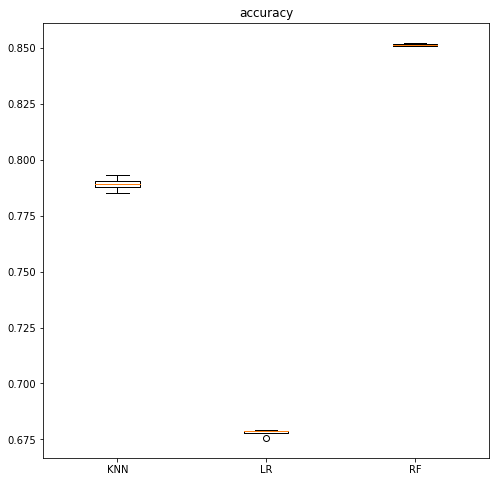

In [ ]:
model_evaluation(models, report = True)

xgb: 0.8022843245453117
[[46363  5103  6161]
 [ 1247 41707  7101]
 [ 5564  6364 39912]]
 *** 


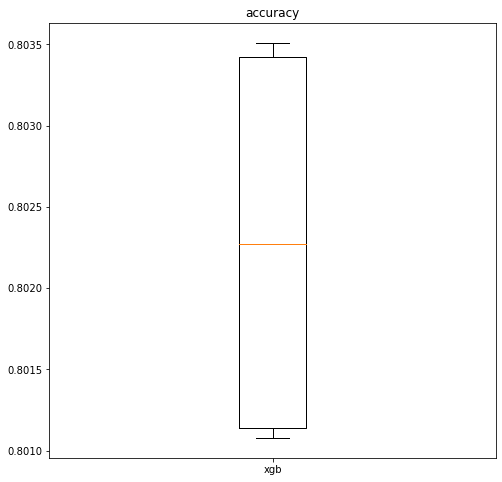

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar las etiquetas de clases en tu conjunto de datos
y_encoded = label_encoder.fit_transform(y)

models = []
models.append(('xgb', XGBClassifier(random_state = 42, objective = 'multi:softmax')))
model_evaluation(models, X, y_encoded, scoring='accuracy', report=True)

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supongamos que ya tienes tus datos de entrenamiento y prueba: X_train, X_test, y_train, y_test

def create_model(optimizer='adam', activation='relu', units=128):
    model = Sequential([
        Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(64, activation=activation),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define el modelo KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define los hiperparámetros a buscar
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'units': [64, 128, 256]
}

# Define la estrategia de validación cruzada repetida
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)

# Crea un objeto GridSearchCV para buscar los mejores hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1, scoring='accuracy')

# Entrena el modelo con diferentes configuraciones
grid_result = grid.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y la precisión obtenida
print(f"Mejores hiperparámetros encontrados: {grid_result.best_params_}")
print(f"Precisión en el conjunto de prueba: {grid_result.best_score_ * 100:.2f}%")

# Evalúa el modelo en el conjunto de prueba
y_pred = grid_result.best_estimator_.predict(X_test)

# Calcula métricas adicionales (precision, recall, F1-score)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")
print(f"Recall en el conjunto de prueba: {recall * 100:.2f}%")
print(f"F1-score en el conjunto de prueba: {f1 * 100:.2f}%")


AttributeError: module 'tensorflow.python.util.dispatch' has no attribute 'add_fallback_dispatch_list'

In [ ]:
# Elegimos este modelo
# Tuneamos el Random Forest

from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [100, 1000, 5000],
    'max_depth': [None, 50, 100],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
    'max_features': ['auto'],
    'bootstrap': [True]
}

# Crear un RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=4, verbose=2, random_state=42, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros en tus datos
random_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Mostrar la mejor puntuación
print("Mejor puntuación:", random_search.best_score_)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


KeyboardInterrupt: 

In [ ]:
models= []
models.append(('RF', RandomForestClassifier()))
model_evaluation(models, report = True)

In [ ]:
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Mejores hiperparámetros:
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
Mejor puntuación: 0.7583535040378526